#2. rebalance

In [1]:
import os
import cv2
import numpy as np
from glob import glob
import tensorflow as tf
from tensorflow import keras
import tensorflow.keras.backend as K
from tensorflow.keras import layers
from PIL import Image
import albumentations as A

from scipy.io import loadmat
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
### source :
src_image_path = '/content/drive/MyDrive/Colab Notebooks/suadd/inputs/'
src_mask_path = '/content/drive/MyDrive/Colab Notebooks/suadd/depth_annotations/'

### destination
image_corrected_path = '/content/drive/MyDrive/Colab Notebooks/suadd/depth_corrected_inputs/'
mask_corrected_path  = '/content/drive/MyDrive/Colab Notebooks/suadd/depth_corrected_annotations/'

In [5]:
duplicated_images =[
['./inputs_larger_views/8de58b4322f74c0183ab633b8aefd0b6-1658374287100001407.png'],
['./inputs_larger_views/8202539bff6941d5961b7836b15981f2-1619039403400004642.png', './inputs_larger_views/08f89fe695b645f08595c1a951ad4607-1619040011400003560.png', './inputs_larger_views/e25f17a327004f8988b168e9c7ddd52c-1619038559100008262.png',],
['./inputs_larger_views/66ae17b783914fb0af589118f7317f26-1617047386400005176.png', './inputs_larger_views/48eee60ab58642b2ad972122a4142904-1617048213700003440.png', 
 './inputs_larger_views/62022db7d993471cb3086fad16ac54ff-1617046813300006003.png' ], ##kind off,],
['./inputs_larger_views/1b709866c00444cb81da6548774c40c9-1623776518500002644.png', './inputs_larger_views/4914c21abf784dee81d54486815f31f2-1623775409300001059.png', './inputs_larger_views/d7733b8a7de6420ea64c19b9349089d7-1623776000000003714.png', './inputs_larger_views/65b472b814d947a28581ac1b10fb026c-1623774886800005156.png',],
['./inputs_larger_views/32f120c5305a4c5bbfe8fd15eaa52d6e-1620064089500005177.png', './inputs_larger_views/1c388129c6a94ef883e4f8cfb8ea3046-1620064829500004148.png', './inputs_larger_views/88f4cb1a58574f3d845a3faf9f7000bd-1620062306700019595.png', './inputs_larger_views/23233fa8c58d452fbbbe5314961aa610-1620063420600006641.png', './inputs_larger_views/4e0f54ceb0b94d26a18dd3271ea8f3f1-1620065327400004671.png', './inputs_larger_views/054c11733d3e4ea79458cb2dace13be3-1620062820500003450.png',],
['./inputs_larger_views/922d0df2aa8d4288b280674eb80d8e38-1623367052200005145.png', './inputs_larger_views/192541d3c2ab44339d7c3ef92ac08759-1623366382200011229.png', 
 './inputs_larger_views/2036f335ed6a47ac84fcf8c6876591e6-1623365448100014178.png', ], ## verifier 3e
['./inputs_larger_views/3af7f11f038c4d8187bc0df505d6acfa-1644529920200016287.png', './inputs_larger_views/ac94b46280c34fcbbf23d3656ac00b44-1644530945900006622.png',],
['./inputs_larger_views/ed4a3859216a48db8b6d04eed5aacdc5-1618343937200005558.png', './inputs_larger_views/96fe8f9225c2416da801083de8b266ad-1618343215100009479.png',],
['./inputs_larger_views/29406ccf164e47f381fdd5d027576276-1625161960100008763.png', './inputs_larger_views/9870a475e7934cc6bc85aea6bdf80d93-1625162711000005586.png',],
['./inputs_larger_views/7c2f8d6aaacb440aa01a8a7032901e85-1621285175100010055.png',],
    
['./inputs_larger_views/38d2bca981394980b26a2943d1d7c2f0-1624901636000004224.png', './inputs_larger_views/c42fac0cf3e34db28ec914d134379255-1624900227900002014.png', './inputs_larger_views/8ff7cee09e634122a0116ae9d587332e-1624899775500015030.png', './inputs_larger_views/5e7dc890bfea45098a68ecf1c0daefbd-1624901047800005210.png',],
['./inputs_larger_views/cfea91984b604e76badebbea792f676a-1623361076000004902.png', './inputs_larger_views/1b2a05f4b3f44cbd83fde6c8835d532a-1623362032500012259.png', './inputs_larger_views/7c271774b5d943038775112dc2dd7af8-1623362704600005857.png',],
['./inputs_larger_views/c76edb7a237442398589e3238a1230a4-1612397820900000861.png', './inputs_larger_views/780c0807242849248970a0e3252fc3c4-1612397402900001580.png', './inputs_larger_views/1c4b651a263f41c791776fee50e4fca6-1612396205200010860.png', './inputs_larger_views/04ff5c7635eb48a09a6c0e1de38b2229-1612396866100003890.png',],
['./inputs_larger_views/eb3fe9c440ab4e9389a3f689d7bd92f0-1617730791500004351.png', './inputs_larger_views/edf4feea97b84a9aa58671038a8ffd6d-1617730193300005364.png', 
 './inputs_larger_views/a531270d23a04a9eb9ae91d1be14b81d-1617729597600016091.png',], ## check changes in luminosity
# ['./inputs_larger_views/da4cc49f4507413981793b8479abd873-1628011281100006464.png', './inputs_larger_views/77cd0ba0d82d4775b377e3e3f095fae0-1628011861000005388.png',],  #vignes :## similar to 7c772ac896984b6885ea3c86edebd8c4-1617900397300009958.png #vignery: 019c9f9128464ab59a58f2e95f83d55a-1631898858600005621.png
['./inputs_larger_views/7c772ac896984b6885ea3c86edebd8c4-1617900397300009958.png', './inputs_larger_views/5dc617065cd84d67a99c4ca37a1fcc83-1617900951200002925.png',],  #vignes
['./inputs_larger_views/6ce8414adf964ce6b129987571db3ba2-1621288168200050743.png', './inputs_larger_views/f6d208ab107b425bae6f41f75bbe8f59-1632342810400003562.png', './inputs_larger_views/8ac50af2a5c240e48e560c1ee7381e86-1632342296700009436.png',], #fist one slightly diff
# ['./inputs_larger_views/0fbb3bd92b1a4cccbbfd10d5f345b273-1621371787200010506.png', './inputs_larger_views/e96b49a584a040209fc4e0b9ba7cbb3f-1621370692100010852.png', './inputs_larger_views/db86f9a4c2fd4e60bcf24b057d08c305-1621364836400015192.png',], #vignes
['./inputs_larger_views/54ae0a04fd24424ab9b73f1a804dcaee-1624551234400002889.png', './inputs_larger_views/a95e068eff8e4e75ba060ff132a0d136-1624551742700001971.png', './inputs_larger_views/fa2f40d005e04f6d8b2d8946211a3b5c-1624550757100004381.png',], ## last one slightly diff
['./inputs_larger_views/bb0a4ea5aaab4cc9884d436a035168b8-1617210271600004675.png', './inputs_larger_views/64aef2ce8a1c438db0866641b19f2055-1617209464100004039.png', './inputs_larger_views/494db3aa75064e61a33d35e409b34685-1617211364900001916.png', './inputs_larger_views/e575bb1a59864b068520989d2d925421-1617210868700002957.png', './inputs_larger_views/3d0fff55ca2646f89dbabadd61536be6-1617207419500005026.png',],
['./inputs_larger_views/dd6b19911f1843d695fe490b2b7e60b0-1631484387600003718.png',], ##L shape roofing
# ['./inputs_larger_views/c651c9132c994487804ef4c74d3ef4db-1618944321200005672.png', './inputs_larger_views/15fe8913d2c74fa59ab5f53aca53b7a1-1618943060800006898.png', './inputs_larger_views/90157d8c90b44497b10c8f34f8d9ab29-1618942361600023650.png', './inputs_larger_views/5404a5bcb2ee405db993861924803a3b-1618943521600001598.png', './inputs_larger_views/f2cbf871c46041978020f4d49e0eceb1-1618945785000004201.png', './inputs_larger_views/50d640234030421f8bde2868d97b64bd-1618945006900005753.png',],
['./inputs_larger_views/6ccd7326cdf84ef5a963472e6808d4ca-1619539864900004200.png', './inputs_larger_views/f403099d20bf4899a70ab0d817ad0d7b-1619540311400001588.png',],
['./inputs_larger_views/21de6f5ba9bc4dd5aa4c25a97733d220-1628195536400002753.png', './inputs_larger_views/db7a193641734182aab1789f6fd51490-1628196603300001333.png', './inputs_larger_views/25f0f91cc29f46e8aa7a58375fc9374c-1628196263400002752.png', './inputs_larger_views/c64d4545ccee49f6958670ee2636b45a-1628195877500001811.png',],
['./inputs_larger_views/231e0de8208a4fc1aba1cc4f2eaaac42-1622065380000001871.png', './inputs_larger_views/4b54647bb4944167ae4c8ccf74a7ddec-1622064426000006809.png', './inputs_larger_views/5bcde0ccaef84b2692897574e4745b41-1622064925000003538.png',],
['./inputs_larger_views/a219be9df80b4431bd952700b840262f-1622741974400009778.png', './inputs_larger_views/891d24c5cee840f3941a2bb9d7e46070-1622742560900004527.png', './inputs_larger_views/5fd37f2e12a046d2aad076e622755e98-1622741151900024567.png',],
['./inputs_larger_views/9413b2cc11ff40a49c68be94b9148bd6-1606950893600004361.png', './inputs_larger_views/5039e0e97ac748e0b7c398bd84117a74-1606950261100013775.png', ],
['./inputs_larger_views/e6d7db99b4714c478df0187bc99b3e47-1624393553400009728.png', './inputs_larger_views/e560e2abf4a741978ea9f92d1dc1db3a-1624392684200008626.png', './inputs_larger_views/f01b2abd77d843a5bbf937e01db032ef-1624394080900003341.png',],
['./inputs_larger_views/167f22e1c6d0452a9cdc6dafa92848bd-1624901439400001792.png', './inputs_larger_views/316c6e416bb44ff7bfa3feacb80d7c32-1624900983000003713.png',],
['./inputs_larger_views/792444f2973d41429fed6d157a736b17-1621891761400002436.png', './inputs_larger_views/d7bf309a43af485d9ba6e80598407468-1621891235400015461.png',], #similar to: './inputs_larger_views/da7d9f7e9c014b74b01e70252c9322f2-1643928296900016102.png', './inputs_larger_views/1826cf9da2d54b38a0deac2c01d694c8-1617305405400016479.png', './inputs_larger_views/d0e01bab875542a6953ada15d8c6a91b-1617306213700009224.png', './inputs_larger_views/9e179fcf5ca74ea0a7905c03ca86b8ad-1643928765700004226.png',],
['./inputs_larger_views/ba5487adfa3d4e09bea7d567b5faef52-1619108698300008597.png', './inputs_larger_views/2926994c8b60434ea9b9d6886f359fc3-1619109304800004675.png', './inputs_larger_views/a24e48c94a8e4912b0094be98f7517c4-1619107926900016575.png',],
['./inputs_larger_views/fdf84a60d8a7441c8ab130a7ec4bf78d-1617729146500005804.png', './inputs_larger_views/d382c141fc804e1191c7256a6de7f1c9-1617729608500001912.png', './inputs_larger_views/328a7831c6f64cf7b0494d292a412fa4-1617727821000002910.png', './inputs_larger_views/f5c241d1222e434e8e4e1407fb6701b6-1617728474500002709.png', './inputs_larger_views/3cc7c8c69c8547be8fdf4094d4f167e5-1617726822300001446.png', './inputs_larger_views/88aeb88e198e44a4b933ea3559ea80ec-1617727278200002308.png',],
['./inputs_larger_views/094bef906bfa47fcb41e198b3741ec63-1621449096700005234.png', './inputs_larger_views/c2b7fd9388f44060848d85db7f12d9b5-1621448439200003665.png', './inputs_larger_views/a1cdb67568124e548a7c3ed0b0b9ce2e-1621447847300005501.png', './inputs_larger_views/f316ba069d1f4ef48a34c36839b6f31c-1621445708600021585.png', './inputs_larger_views/b219a4fc4d554ccd8d38b9d12d8a3eb6-1621447095900003236.png', './inputs_larger_views/d1c6c9d991c246aa99f266f4aa65caa7-1621446528500009732.png',],
['./inputs_larger_views/1d00b0a3a3f643f1ae268f87f3fd77f7-1614808722300010464.png', './inputs_larger_views/ee655b7463ae41968ac609a6d1a7b0cb-1614810009700012934.png', './inputs_larger_views/0ddc87cbc3fd4673b926b80b708785cf-1614810875200010582.png', './inputs_larger_views/9fa0676490b744c1b04f205704f91d43-1614811725800009590.png',], #different lightling on these => './inputs_larger_views/93807df84a824cdc9127a5b3674cd630-1630863018400001375.png', './inputs_larger_views/b4556c0520b9486294ba24edb26be619-1630862699100003370.png',],
['./inputs_larger_views/30ed15a9d0564ff384747d86e4742fcb-1613514530700006197.png', './inputs_larger_views/20b88c9d52184113a2ee356ab14754a4-1613513847700009573.png', './inputs_larger_views/16efacce0e824e6f9e15149e0d9c57a0-1613515284400005935.png',],
['./inputs_larger_views/10ccc04a238946478a1c8b0c824ff9d3-1621447924900006139.png',],
['./inputs_larger_views/d4399b6873b648898f06db70fa89c691-1619027064400003527.png', './inputs_larger_views/ded7816c2be44b4eb7d06e2b62e520e2-1619024782500010164.png', './inputs_larger_views/782bab7c26c34eeeb108490b209c56a0-1619025238700002214.png', './inputs_larger_views/e7bc31f0df12478c9a01d5cfb2407ce4-1619027823900004892.png', './inputs_larger_views/dacada20c4504b7f8a2f7ffbb4007fd0-1619026567700004163.png', './inputs_larger_views/ab7d7eaa81f14841bf8e632c01550924-1619025815400002361.png', ],
['./inputs_larger_views/d379bed59f30409bb088f571610183cb-1658289536400002020.png', './inputs_larger_views/aa31bff74bec453ea28f27b7e17b1477-1658289895700001574.png', './inputs_larger_views/6ae31c29c6af45bcb30aa8d326284fcf-1658289192200011308.png',],
['./inputs_larger_views/aebae6ef758540f28814cc34e43b1952-1619035678800002304.png', './inputs_larger_views/ead7e12e0caf485fbaa0f14d93985ea1-1619035302800002186.png', './inputs_larger_views/c5e91d1c1cc44fbaae28a48146de3824-1619036079500002717.png', './inputs_larger_views/2ee95e1d83c6484586db95948c2dafc9-1619034847800006821.png',],
['./inputs_larger_views/89754e24fdb44ad484057f7e295ac158-1620063983600010712.png', './inputs_larger_views/bc0d101a71434c8795f381c1ada8e1e1-1620064803700009877.png', './inputs_larger_views/3b1c50deb5fa4c8e80b59ab2bec8835f-1620065486200005362.png',],
['./inputs_larger_views/872c27808cf14eb0bd37346eb4d7bc4f-1618856199500002862.png', './inputs_larger_views/1d3502a94e164047b72dfb256fc3222d-1618852827900006680.png',],
['./inputs_larger_views/abbf4f2ec8224abbad5c6f09f8fb9551-1620145822500005010.png', './inputs_larger_views/f9fae46e09b14bd0b5d45ea2d7109d5e-1620145160400004558.png', './inputs_larger_views/c388e1394f6f4380a97b789a83782994-1620144473800003035.png', './inputs_larger_views/ea1f385224644c9bb1ca1f7e00deffce-1620143327300019696.png', './inputs_larger_views/2017182b09754d29b26237562006e744-1620143904200004432.png',],
['./inputs_larger_views/e42d51d5071540babbd4b49be3c15ad6-1657241943600003680.png',],
['./inputs_larger_views/7843cfcbb63648bf90ba79f67521adc7-1618248564800011414.png', './inputs_larger_views/d7654235185945ae94acff5bc50e1c73-1618249606600009319.png',],
['./inputs_larger_views/95be161966dc4ccf90ba1efbe1cb65a5-1619547412100010886.png', './inputs_larger_views/9fb3f1b0c18b47d9ab437c383e3112aa-1619547918500002631.png', './inputs_larger_views/294f0a76a9214d71a00f27a4e14a7c45-1619548483400003014.png',],
['./inputs_larger_views/87657a04c38c478fa99e4b86ff95ade1-1621278522800006959.png', './inputs_larger_views/ceb085229d744390825819837ae20708-1621280068100003396.png', './inputs_larger_views/b79e3c6310574145b1ccc5dddb4502f1-1621280555500004594.png', './inputs_larger_views/e429282023f246818ca8298a9febd770-1621277849600015121.png', './inputs_larger_views/748f7ecdd8434553a7a8d341eda4419e-1621279538000003535.png', './inputs_larger_views/8d0b987dba1b41d1b1ffeee623337946-1621278935700002290.png', ],
['./inputs_larger_views/204405ffa3c74a63bb9e00a22ff7178a-1617226737800003384.png', './inputs_larger_views/25fc2dcadf30449fb6cb5778e306fb9d-1617226244100011675.png', ],
['./inputs_larger_views/1324c17cbb0f424caa27c0f525cbf36e-1653323872900003034.png',],
['./inputs_larger_views/ad3b5f6a9893494682d1c560779837b7-1623259374400004673.png', './inputs_larger_views/0b23fb62b2624c7588da634875907631-1623259906500003313.png',],
['./inputs_larger_views/f4a6543c9b7e4df6a74d86b0390d590f-1622585320000009283.png', './inputs_larger_views/3a915024fd15488cb4b8fe5762548a4b-1622586002700006871.png',],
['./inputs_larger_views/518e97ff25b644baa2f6812f00f0a5ef-1621444821700011054.png', './inputs_larger_views/e1a5d6fd614b4c2abe116884235ecad8-1621446444100012422.png', './inputs_larger_views/a340eaa5cece4f49ad275f67bc160f2c-1621445433800005509.png', ],
['./inputs_larger_views/7743e90f1205464696e4f72ac2f30108-1613586761200003194.png', './inputs_larger_views/2f7bcc19c27d4098b27698cf3db768c0-1613586178700002593.png', './inputs_larger_views/3472406edf6e4d3896db1a11cf5fbd26-1613585356200005186.png', ],
['./inputs_larger_views/7b4aa2259aa44a82b1d8e253f1167b06-1618352773700006436.png', './inputs_larger_views/07ffbc6fbddd455db768295fce6c9f53-1618352082100014774.png', ],

['./inputs_larger_views/f7d74954c6b74475b601bb8af1ce00d1-1632243667500002909.png', './inputs_larger_views/ac879c892f4c4e5b88301fbf85494b23-1632242588900003232.png',],
['./inputs_larger_views/c7982cacf0a94c739443a819da0e33e8-1617729679500015264.png', './inputs_larger_views/456dd50951894b1a89e2a7897f690da7-1617730653200002445.png', './inputs_larger_views/4226542a925248b39d464bcaeb45025c-1617731105900003756.png', './inputs_larger_views/5d4656131e8d49f7ab9db2ad4de572d3-1617730221700003735.png',],
['./inputs_larger_views/7163d1e941434aba8d6edb1a4794c98d-1617912870800002635.png', './inputs_larger_views/5bd8d91aec3d4485870539e87302ab2b-1617913648400003886.png', './inputs_larger_views/37d749ed2a3949d9b16f0aad5a57b5c0-1617912374600004895.png', './inputs_larger_views/16e9dcda222a41859e4e9e86bfc438ae-1617911789000004549.png', './inputs_larger_views/3edd0f20c63444399bb6e1433ff4a0a3-1617914690400005721.png',],

['./inputs_larger_views/baf8c858f5454b33b2cf422bcc5d9827-1622051550800003000.png', './inputs_larger_views/eb97dfc011104c9d93567af8caf150f8-1622050305900025964.png', './inputs_larger_views/15be0a6408284c1783338aea7bb7893c-1622050991600006681.png', ],
['./inputs_larger_views/3170e46abf8e4974bb0578b435743366-1617214532400014689.png', './inputs_larger_views/c25de20505b84e859fbb961e03b4887f-1617215179900005298.png',],
    
['./inputs_larger_views/ffa00bc2e87d4c3a85ce2ef5527b34b8-1632161999300002813.png', './inputs_larger_views/bf1925dff2f942b1a3d01462661be818-1632161439300006590.png',],
['./inputs_larger_views/47e07b3ec73c45ea8ac69bfc2a1ee3fd-1615932091600006574.png', './inputs_larger_views/f74ef786009948a58c53535dce93c3db-1615931451400010769.png', './inputs_larger_views/89e3d39932844b43ae5b9c0b48c6aafd-1615932515500003051.png',],
['./inputs_larger_views/a5a83de959aa433a8b5b2d258804bc1c-1616704541800003254.png', './inputs_larger_views/8e415c8c83a244ffa3535ab547c144cc-1616705115300003861.png',],
['./inputs_larger_views/98fdd7d3fe50494583aa81092e5a08da-1631204780100002098.png', './inputs_larger_views/c3a116194899455c90726103910f2540-1631204407300005462.png', ],
['./inputs_larger_views/9f9eb69cd0994981bd03bae31f2b4d6c-1618941012000011224.png', './inputs_larger_views/a4dc322c09d3401aa7fcc1007fc1d867-1618941608500004918.png', './inputs_larger_views/d1158187339b4068b191098195590cbb-1618942152300002719.png',],
['./inputs_larger_views/c3133131eabb43cfa60451451ef817e1-1652805476400004455.png', './inputs_larger_views/333c32ee635541549d85f191c600ddb0-1652805028200014188.png',],
['./inputs_larger_views/9e179fcf5ca74ea0a7905c03ca86b8ad-1643928765700004226.png', './inputs_larger_views/da7d9f7e9c014b74b01e70252c9322f2-1643928296900016102.png',],
['./inputs_larger_views/eb01a7dc44974dda82a7e091deac1a3f-1620770006500005699.png', './inputs_larger_views/c5c3c1a91d4746c6a35c501fa1576728-1620770757200004283.png', './inputs_larger_views/ed1a0238adf64e3c8e5d22758863b7e1-1620768739400010154.png', './inputs_larger_views/f0d7eaf3629840149054be131dfb33f6-1620769358200005676.png', './inputs_larger_views/93eba22e5f174c2e9aa64d335fa3c5e2-1620771564100002294.png',],
['./inputs_larger_views/503bbac676b54a3d861547d4ddec39f5-1634593511100001936.png', './inputs_larger_views/fda5cf55f0d243c2bc1ce27fa3cc4887-1634593153600003135.png',],
['./inputs_larger_views/2edb4632d8704502b777c84371521b39-1619462428400005691.png', './inputs_larger_views/45c5ef19885240b7ad9cd7a8b4cf546e-1619463055900005635.png', './inputs_larger_views/7429a9c7b8d142899d668c958e7a8ef7-1619463644900002582.png', ],
['./inputs_larger_views/d9f11224a93543dead4cbb1ea3a6ce84-1654619297300021273.png', './inputs_larger_views/0b66b225b3cd460a932d7997666c69cc-1654619801900005458.png', './inputs_larger_views/9b5d64b124404976910296c14616b457-1654620513100009522.png',],
['./inputs_larger_views/4a0f4f1b89e54e619b71d8dacee5e618-1643926040200005290.png', './inputs_larger_views/52224b3085674b8881aebbd585b21118-1643925469000008440.png',],
['./inputs_larger_views/ae2f0301235c41bfb13fb3e9faa4d798-1621875569700017007.png', './inputs_larger_views/942da0d4735f4dbeb80d7f03daf4e437-1621876243500005155.png', './inputs_larger_views/4f7026da0b67442ab52b039f3d0feddb-1621876733900002273.png',],
['./inputs_larger_views/40d438b855224619b27326a9d88e659a-1617746170600004477.png', './inputs_larger_views/5ebd54a6da60488b9549f3387041e8da-1617745602700010386.png', './inputs_larger_views/49c5508373d34583b741bd2e35587edf-1617746702700003373.png',],
['./inputs_larger_views/d30438ad21d64a1c82fdb981165129a6-1618257258700004651.png', './inputs_larger_views/6ca5e034cad94fbda2d72b68b848d7e5-1618256175500003052.png', './inputs_larger_views/e2b0820096dc495ebd29f3b8c44886d9-1618255723200003542.png', './inputs_larger_views/547ffbbc52af47189f49cd0f3b5e4bf6-1618256624000003295.png', './inputs_larger_views/3944c727a1b84f67b395384893343bc3-1618255220400005808.png', './inputs_larger_views/31ef1f041d0a4745b0510e7b83cd8f0b-1618257860700004827.png',],
['./inputs_larger_views/10837b1a28b6413bae5e496213649f3d-1624557635900004947.png', './inputs_larger_views/7f24fcd40cd74f20ab33700bf3ab3ef1-1624558486400003558.png', './inputs_larger_views/4b37c2ddfc4347828c52529bb46e66c0-1620073953000004422.png', './inputs_larger_views/bb77c46dc5e34f55a6169bc6d1d37f0d-1624556114800051284.png', ],
['./inputs_larger_views/9058daa0f612450ab4901ccdf39512b8-1623177895300008152.png', './inputs_larger_views/9b345ff8cfca44bf946a3a45bd13204e-1623178456500003592.png',],
['./inputs_larger_views/620c2486c4e548989ff754784b919f0b-1624909807200009822.png',],
['./inputs_larger_views/d1c12a0f14ca4394a11b026a2df9396d-1631210427500002207.png', './inputs_larger_views/347438dba2034c259383c1510a0ec5ce-1631209672400007819.png', ],
['./inputs_larger_views/601472f5d0b34b028d7068b63e75b0fd-1620249701800017923.png',],
['./inputs_larger_views/d38dcf58f59142569e2f6b380ddecdc0-1655828530200016277.png', './inputs_larger_views/cff650d368b943a18c6cfc6488c45a9d-1655828994800004541.png',],

['./inputs_larger_views/b9113f0a301a45f9a07c617f9696e6c6-1627404962600007403.png', './inputs_larger_views/283c221560de4260b9de627416669e53-1627405370600001532.png',],
['./inputs_larger_views/d1f46f22e0f24546a4c1e84437034ed1-1629909363200003263.png', './inputs_larger_views/f2cbf871c46041978020f4d49e0eceb1-1618945785000004201.png', './inputs_larger_views/c651c9132c994487804ef4c74d3ef4db-1618944321200005672.png', './inputs_larger_views/5404a5bcb2ee405db993861924803a3b-1618943521600001598.png', './inputs_larger_views/90157d8c90b44497b10c8f34f8d9ab29-1618942361600023650.png', './inputs_larger_views/15fe8913d2c74fa59ab5f53aca53b7a1-1618943060800006898.png', './inputs_larger_views/50d640234030421f8bde2868d97b64bd-1618945006900005753.png',],
['./inputs_larger_views/072b9f864f8f445485df414fbed70cd4-1613601058600003328.png', './inputs_larger_views/d0e8a2148d6f4263b66b4afbda56695e-1613601722800006312.png', './inputs_larger_views/26d2a65804bf4858b94eb1121185c174-1613600569500010897.png',],
['./inputs_larger_views/54b153c4c626433abaf22786b0f76266-1618259679100014899.png', './inputs_larger_views/babf433a48ce4e05a470b698ba596c74-1618260469700003669.png',],
['./inputs_larger_views/f7128caf7caf436b8aacf94255bf0393-1618422523400006117.png', './inputs_larger_views/804be9dcbfd1482e99725d423c10df9e-1618421830500004799.png', ],
['./inputs_larger_views/9db5dd4832df40cab0cb3126bd617be5-1626298636100006417.png', './inputs_larger_views/f3ab6afd33a54a35982f97d80293d830-1626297938300006007.png', ],
['./inputs_larger_views/c5b7c8e267ee43128518441be69151da-1621974631400003665.png', './inputs_larger_views/eff3c43f50074dc280d6c14e0cb1ab26-1621976408100007127.png', './inputs_larger_views/fc4c7367a1784219be46a733ba33fcf1-1621975779700010235.png', './inputs_larger_views/ca5556d957ea434a88de0d8c6b9f40a9-1621974058100011675.png',],
['./inputs_larger_views/5bcf60c926e34fb3ad1c8fc935502261-1658359118700006983.png',],
['./inputs_larger_views/2bc869817a33475296e34fcc9815c565-1619638948600015852.png', './inputs_larger_views/3125baa3ea644781ae95c5e24fdf88a7-1619639550400003208.png', ],
['./inputs_larger_views/38b71eec341646ddbb22b8cb99d733ae-1622060451000010410.png', './inputs_larger_views/b9ef87989f654dec8e9a898af819f8dc-1622059552600008834.png', './inputs_larger_views/133d20d5285a4650844295ebf836926e-1622061044500004891.png', ],
['./inputs_larger_views/b4556c0520b9486294ba24edb26be619-1630862699100003370.png', './inputs_larger_views/93807df84a824cdc9127a5b3674cd630-1630863018400001375.png', ],#'./inputs_larger_views/ee655b7463ae41968ac609a6d1a7b0cb-1614810009700012934.png', './inputs_larger_views/9fa0676490b744c1b04f205704f91d43-1614811725800009590.png', './inputs_larger_views/0ddc87cbc3fd4673b926b80b708785cf-1614810875200010582.png',],
['./inputs_larger_views/934e55d3b4714ed7ba3d0716b534b5a1-1613596609000009687.png', './inputs_larger_views/91f219c5e5314cdc987b06d305ff884a-1613597214200003935.png',],
['./inputs_larger_views/bb7f7ca7636d45e9a8cebf3894a0e101-1626195025500005145.png', './inputs_larger_views/3109e82c0cc24042b13fae371daa0fb9-1626195752000007699.png', './inputs_larger_views/610dbc85db4348d98da605a825be5d20-1626196460100003987.png', './inputs_larger_views/d741f36bede9409bb26a080d829ce28d-1626196891200002962.png',],
['./inputs_larger_views/6734b86156ae4e26b39cb86be9d5edf7-1607635353800007404.png', './inputs_larger_views/1803214a8b7a474892fbe776e1aac23f-1607636505200003332.png',],
['./inputs_larger_views/51433d0f4dda49239ce1a1de4ec291e0-1617816577400004671.png', './inputs_larger_views/7e268c3dba8941bdafb5802cf5fbd39c-1617817168300003007.png', './inputs_larger_views/7307f27e44184a4b94fa7998383c68cc-1617816008900009251.png', './inputs_larger_views/d71c42c2da144768b1c84247f856641a-1617818096700005217.png', ],
['./inputs_larger_views/353002bb8e6b48bc9d57a0558183c828-1626127552900011381.png', './inputs_larger_views/cdea1eed27654f2f88fcaa98fb551bcb-1626128177900005417.png',], 
['./inputs_larger_views/9a71d82b827e4fd6acad4d6137391447-1619645249100008219.png', './inputs_larger_views/bf6491103f03401d9f33e9865298dcb4-1619644283900002326.png', './inputs_larger_views/e02ed09b04df4b29a42389fecd40d3e9-1619648553500007910.png', './inputs_larger_views/344f520a2b0c407e9b22a516e03f49e9-1619646997200004389.png', './inputs_larger_views/5ee5bfff18fd40d6944a70478645279b-1619645807800003356.png', './inputs_larger_views/a4bfadd15cca4a63b06af68b7656bace-1619647731500005121.png',],
['./inputs_larger_views/5035158b6a2d45fba5a7d905bd178d62-1616710030500009125.png', './inputs_larger_views/372c8d6d69f241bdab41df49e4c7937e-1616710591900004599.png',],
['./inputs_larger_views/14c532a8627845af80a102597063b072-1621449118200012195.png',],
['./inputs_larger_views/2c8b4afe3f0b4724a2fcf8b17415bb94-1623093371800006741.png', './inputs_larger_views/4c0f4f2c5b1346fe94e33471f6536bfe-1623092660900002340.png', './inputs_larger_views/f5f3bbe3981e4046b1d3abd2f8d5d1d0-1623092193700014326.png',],
['./inputs_larger_views/1716b622a6cb42828e61a5546317a437-1616446312900003358.png', './inputs_larger_views/1012f99c2c6149fd8d9673bdf54155d5-1616446840900003156.png',],
['./inputs_larger_views/6d5d99be78154507ba807e2844869f86-1612481548400003887.png', './inputs_larger_views/b3b6aadfef4045b8881c7e9ef8550b9c-1612482189900004521.png',],
['./inputs_larger_views/5f46d766632b4de4988a67a016ca2392-1617223875100013341.png',],
['./inputs_larger_views/e1c678a8cd6d483596798ad0bdb79ce3-1620150102400003966.png', './inputs_larger_views/4ac567d1a5f94b08a427e08878a1d383-1620149559400006934.png',],
['./inputs_larger_views/3adcd2baeebe44eaa1e207fddc5abd40-1629663111100008788.png',],
['./inputs_larger_views/3b16fcf3b31049ce81aa3d2c7fd2d3ef-1637004390600006112.png', './inputs_larger_views/4e704628d4ef40cfb29b65496b513640-1637003799100007707.png',],
['./inputs_larger_views/6c28c151db94488a91952108f23deaa8-1617811386500031591.png', ],
['./inputs_larger_views/878b9d9af3354c00be657768d0e11a26-1621370560400022759.png', './inputs_larger_views/5e6a6ea21f5e498486acc453eb7bf756-1621371193600006082.png',],
['./inputs_larger_views/3dc2141f80e84a579436783b8f408f94-1621972730500002797.png', './inputs_larger_views/e6099e59f93b445eb1a0b71c3e1fcab9-1621973244800002782.png', './inputs_larger_views/116a967c5b0a4d9f9ae63f9a27d34491-1621972253700009264.png',],
['./inputs_larger_views/e621402591c0488ca315279736e26396-1619111204200002569.png', './inputs_larger_views/295d398b4e2142ef91a38ea9576fd1d3-1619110678200004306.png', './inputs_larger_views/b0fc8b368dfa446f826f76e32dfa6a28-1619110071600004469.png',],
    

['./inputs_larger_views/10f786d3736948d78f0185ae781004a5-1622758187700004580.png', './inputs_larger_views/0d6ab5b308994a6e86321f4d4a34db86-1622757582000006294.png'],
['./inputs_larger_views/f7ff60d21e104061850ed09202da21c3-1617742918600003861.png', './inputs_larger_views/9bdd4e00dad44d388cc6150eed7dbd9a-1617743499700003768.png', './inputs_larger_views/834a953a2d7446a89ea3bde1c2084b81-1617744144800003853.png', './inputs_larger_views/349b521a222b4b0fad2d71e7de1e23a4-1617742398800006883.png',],
['./inputs_larger_views/729ad194108c4da4849f3f8dcb2f465e-1619470461100007455.png', './inputs_larger_views/230438eb1fd943c4993f919ee8cbf40f-1619469463600026453.png',],

    ## problem with this one:
# ['./inputs_larger_views/5b6112c35a524fa4acedb076fb72feac-1617744803100004899.png', './inputs_larger_views/1916de35835548a8950b114d179502a3-1617745442700001171.png', './inputs_larger_views/834a953a2d7446a89ea3bde1c2084b81-1617744144800003853.png',],
['./inputs_larger_views/412936ec1839402ca39745135e684364-1629667265100002601.png', './inputs_larger_views/73ab0297622f4cb5a954ec74618864f1-1629667773400004218.png',],
['./inputs_larger_views/d0e01bab875542a6953ada15d8c6a91b-1617306213700009224.png', './inputs_larger_views/1826cf9da2d54b38a0deac2c01d694c8-1617305405400016479.png',],
['./inputs_larger_views/c950ca48417b45978580d22f4e980b1d-1629563393500002323.png',],
['./inputs_larger_views/4d800030a38a4e5db5cbea801bb481e1-1631915979700008832.png', ],
['./inputs_larger_views/cbe292d8482f436a81d8115a6711352f-1633627447200001030.png', './inputs_larger_views/cd4699fe5ea3431f9a8f2e5f6fcb6f69-1633627117700014589.png',],
['./inputs_larger_views/c15e03dec6804ce1b3d77e2c22290c5c-1615331903200006805.png', './inputs_larger_views/082501a56891486280093b593f093ea7-1615331158200005358.png', './inputs_larger_views/a65d20d4d98f4d4bad3f395a2c5fcc87-1615327872400007688.png', './inputs_larger_views/26fdc8a6c55a481185bc77c86185dbd2-1615327139100009978.png',],
['./inputs_larger_views/112287debb4f4fb590464c9ffa1f3ce4-1618263976100007476.png', ],
['./inputs_larger_views/6d8ed4d362f94d20a80a026f52a4f4fd-1660188014600002457.png'],
['./inputs_larger_views/d84d732bc31345dc8d778ba6417a90af-1627596026000004417.png', './inputs_larger_views/7fe11e1aa96b42b7951f617db1bea549-1627595496600009534.png', ],
['./inputs_larger_views/4524d489dce747619028f0d97b080857-1620682342500002710.png', './inputs_larger_views/fc826f0980244d0893e0e4a30fc4b03a-1620683456200002531.png',],
['./inputs_larger_views/db6cd2cace324e38b4188622d6b3e91a-1619717535300019384.png', './inputs_larger_views/2d000465163546eaa8287ab57c091a9d-1619718224500006596.png',],
['./inputs_larger_views/064d495622994e1ab3dfda24db78addf-1660187321900010105.png', './inputs_larger_views/d3c7addb66904937a17a4cf5649b2247-1660187626500001093.png',],
['./inputs_larger_views/d059fb725a984a8e8b088f9f12a2d6d3-1617658482900023339.png',],
['./inputs_larger_views/766b8e722c5e47f195246e60ecde1bf6-1644861264100002259.png', './inputs_larger_views/26a80c3beb964638a414bbe66b94546f-1644860670900014104.png', './inputs_larger_views/369eb1158f204016bb6d4509a4f72005-1644861999900002933.png',],
['./inputs_larger_views/1c34ab84dd6247f08c9a1b01cf5fba19-1621369308700015711.png', './inputs_larger_views/e96b49a584a040209fc4e0b9ba7cbb3f-1621370692100010852.png', './inputs_larger_views/0fbb3bd92b1a4cccbbfd10d5f345b273-1621371787200010506.png', './inputs_larger_views/db86f9a4c2fd4e60bcf24b057d08c305-1621364836400015192.png', './inputs_larger_views/019c9f9128464ab59a58f2e95f83d55a-1631898858600005621.png', './inputs_larger_views/77cd0ba0d82d4775b377e3e3f095fae0-1628011861000005388.png','./inputs_larger_views/da4cc49f4507413981793b8479abd873-1628011281100006464.png', ],
['./inputs_larger_views/60e13aa1f2d04d8981f6c65b08e4dea7-1620764339900006292.png', ],
['./inputs_larger_views/5ddfb70f423c40c4971219be81dee26f-1631916433900004081.png',],
['./inputs_larger_views/4210f23d40a94f1cacf77bb684efef9c-1619119801800004837.png', './inputs_larger_views/e67f53b87b724bc894b633e8498a4c53-1619119252300006320.png',],
['./inputs_larger_views/24e1ca478c16444996087dbed204ec3c-1615925231800007033.png', './inputs_larger_views/c320bd182af84adcb2805aae192b1708-1615924545300008347.png',],
['./inputs_larger_views/17fb2daebbbb4e2f99c74c163aab6afb-1631290855300002950.png', './inputs_larger_views/f52162f51f4344fba442c0ac968ea347-1631290461500010260.png',],
['./inputs_larger_views/9786cc0a190b4b7483615a69a884c3c6-1618265113100005697.png',],
['./inputs_larger_views/dba186fd73e3488789d8326fbd4d9f44-1617210326200002666.png',],
['./inputs_larger_views/490999536d194a53bde8ddcff6994824-1617210399400005009.png',],
['./inputs_larger_views/906e54ead2bd4550822ceac614140c97-1629662338000011836.png',],
['./inputs_larger_views/aa26382e632a49da823446059ce7412d-1622569642100012875.png', './inputs_larger_views/3b035f08133d41b7b94fee4c8536d7aa-1622570267200005573.png',],
['./inputs_larger_views/3d48491db6be4e5c807b29c49511d2e6-1612892341000001603.png',],
['./inputs_larger_views/98daa55e493646488defa00b4b7c097c-1617919899500006850.png',],
['./inputs_larger_views/10d3f6ed2ad3455eb843abba3d99681f-1619550447800005616.png',],
['./inputs_larger_views/3906767d75c44ba786670ea11765528f-1620680178700027296.png', './inputs_larger_views/30855d6156c145889253b6c4f5db670b-1620680984200008804.png', ],
['./inputs_larger_views/5b6112c35a524fa4acedb076fb72feac-1617744803100004899.png', './inputs_larger_views/1916de35835548a8950b114d179502a3-1617745442700001171.png', './inputs_larger_views/ca17c81d845b48f48097b30db1ddbd37-1634665863800001882.png']
]
duplicated_flatten = [item for sublist in duplicated_images for item in sublist]
len(duplicated_flatten), len(set(duplicated_flatten)), len(duplicated_images)

(358, 358, 139)

In [6]:
358*5, 139*5

(1790, 695)

In [7]:
duplicated_images_prefix = []

for i in duplicated_images:
  inner_list = []
  for j in i:
    inner_list.append(j.split('/')[-1].split('-')[0])
  duplicated_images_prefix.append(inner_list)
  


In [8]:
duplicated_prefix_flatten = [item for sublist in duplicated_images_prefix for item in sublist]
len(duplicated_prefix_flatten), len(set(duplicated_prefix_flatten))

(358, 358)

In [9]:
1790/5

358.0

In [10]:
ll = []
for i in duplicated_images_prefix:
  ll.append(len(i))

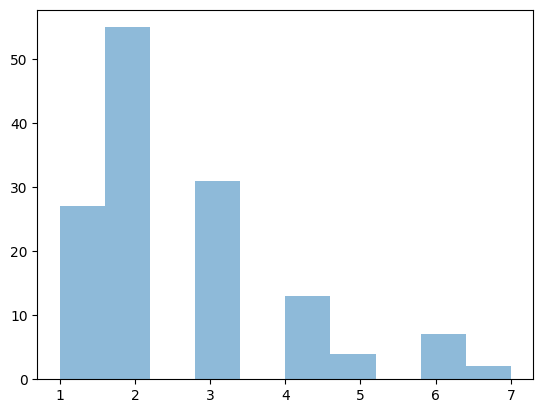

In [11]:
plt.hist(ll, bins=10, alpha=0.5)
plt.show()

In [12]:
len(glob(image_corrected_path+'*'))

1786

In [13]:
image_corrected_path

'/content/drive/MyDrive/Colab Notebooks/suadd/depth_corrected_inputs/'

In [14]:
images_existing_in_folder = glob(image_corrected_path+'*')

In [ ]:
duplicated_images_prefix[:6]

[['8de58b4322f74c0183ab633b8aefd0b6'],
 ['8202539bff6941d5961b7836b15981f2',
  '08f89fe695b645f08595c1a951ad4607',
  'e25f17a327004f8988b168e9c7ddd52c'],
 ['66ae17b783914fb0af589118f7317f26',
  '48eee60ab58642b2ad972122a4142904',
  '62022db7d993471cb3086fad16ac54ff'],
 ['1b709866c00444cb81da6548774c40c9',
  '4914c21abf784dee81d54486815f31f2',
  'd7733b8a7de6420ea64c19b9349089d7',
  '65b472b814d947a28581ac1b10fb026c'],
 ['32f120c5305a4c5bbfe8fd15eaa52d6e',
  '1c388129c6a94ef883e4f8cfb8ea3046',
  '88f4cb1a58574f3d845a3faf9f7000bd',
  '23233fa8c58d452fbbbe5314961aa610',
  '4e0f54ceb0b94d26a18dd3271ea8f3f1',
  '054c11733d3e4ea79458cb2dace13be3'],
 ['922d0df2aa8d4288b280674eb80d8e38',
  '192541d3c2ab44339d7c3ef92ac08759',
  '2036f335ed6a47ac84fcf8c6876591e6']]

In [15]:
import shutil


for i in duplicated_images_prefix:
  toto = i+i+i+i+i+i+i
  for j in range(len(i), 4):
    # print([x for x in images_existing_in_folder if toto[j] in x])
    file_to_copy = [x for x in images_existing_in_folder if toto[j] in x]
    for e,k in enumerate(file_to_copy):

      p = k.split('/')[-1].split('.')[0]      #images:
      src_img, dst_img = image_corrected_path + p + '.png', image_corrected_path + p +'__' + str(j)+'_' + str(e) + '.png'
      # print(src_img, dst_img)
      shutil.copyfile(src_img, dst_img)
      
      #masks:
      src_msk, dst_msk = mask_corrected_path + p+ '.png', mask_corrected_path + p +'__' + str(j)+'_' + str(e)  + '.png'
      # print(src_msk, dst_msk)
      shutil.copyfile(src_msk, dst_msk)

  allfiles = [x.split('/')[-1].split('-')[0] for x in glob(image_corrected_path+'*')]
  print(len([x for x in allfiles if x in i]))

20
20
18
20
30
20
20
20
20
20
20
20
20
20
20
20
20
25
20
20
20
20
20
20
20
20
20
20
29
30
20
20
20
30
20
20
20
20
25
20
20
20
30
20
20
20
20
20
20
20
20
18
25
20
20
20
20
20
20
20
20
20
25
20
20
20
20
20
20
30
20
20
20
20
20
20
20
35
20
20
20
20
20
20
20
20
20
20
20
20
20
20
30
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
35
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20


In [16]:
len(glob(image_corrected_path+'*')), len(glob(mask_corrected_path+'*'))

(2895, 2895)

In [17]:
allfiles = [x.split('/')[-1].split('-')[0] for x in glob(image_corrected_path+'*')]
len(allfiles)

2895

In [18]:
ll = []
allfiles = [x.split('/')[-1].split('-')[0] for x in glob(image_corrected_path+'*')]
for j in duplicated_images_prefix:
  print(len([x for x in allfiles if x in j]))
  if len([x for x in allfiles if x in j]) == 15:
    print(j)


20
20
18
20
30
20
20
20
20
20
20
20
20
20
20
20
20
25
20
20
20
20
20
20
20
20
20
20
29
30
20
20
20
30
20
20
20
20
25
20
20
20
30
20
20
20
20
20
20
20
20
18
25
20
20
20
20
20
20
20
20
20
25
20
20
20
20
20
20
30
20
20
20
20
20
20
20
35
20
20
20
20
20
20
20
20
20
20
20
20
20
20
30
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
35
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20


In [19]:
len(set(glob(image_corrected_path+'*'))), len(glob(mask_corrected_path+'*'))

(2895, 2895)

In [20]:
img_ll = [x.split('/')[-1] for x in glob(image_corrected_path+'*')]
msk_ll = [x.split('/')[-1] for x in glob(mask_corrected_path+'*')]
[x for x in img_ll if x not in msk_ll]

[]

In [21]:
img_ll = [x.split('/')[-1] for x in glob(image_corrected_path+'*')]
msk_ll = [x.split('/')[-1] for x in glob(mask_corrected_path+'*')]
[x for x in msk_ll if x not in img_ll]

[]

In [ ]:
# study of image names:

In [ ]:
toto = []

for i in duplicated_images:
  lll = []
  for j in i:
    print(j.split('-')[-1][:6])
    lll.append(j.split('-')[-1][:6])
  toto.append(lll)

165837
161903
161904
161903
161704
161704
161704
162377
162377
162377
162377
162006
162006
162006
162006
162006
162006
162336
162336
162336
164452
164453
161834
161834
162516
162516
162128
162490
162490
162489
162490
162336
162336
162336
161239
161239
161239
161239
161773
161773
161772
161790
161790
162128
163234
163234
162455
162455
162455
161721
161720
161721
161721
161720
163148
161953
161954
162819
162819
162819
162819
162206
162206
162206
162274
162274
162274
160695
160695
162439
162439
162439
162490
162490
162189
162189
161910
161910
161910
161772
161772
161772
161772
161772
161772
162144
162144
162144
162144
162144
162144
161480
161481
161481
161481
161351
161351
161351
162144
161902
161902
161902
161902
161902
161902
165828
165828
165828
161903
161903
161903
161903
162006
162006
162006
161885
161885
162014
162014
162014
162014
162014
165724
161824
161824
161954
161954
161954
162127
162128
162128
162127
162127
162127
161722
161722
165332
162325
162325
162258
162258
162144
162144

In [ ]:
llll

[['165837'],
 ['161904', '161903'],
 ['161704'],
 ['162377'],
 ['162006'],
 ['162336'],
 ['164453', '164452'],
 ['161834'],
 ['162516'],
 ['162128'],
 ['162490', '162489'],
 ['162336'],
 ['161239'],
 ['161773', '161772'],
 ['161790'],
 ['163234', '162128'],
 ['162455'],
 ['161721', '161720'],
 ['163148'],
 ['161954', '161953'],
 ['162819'],
 ['162206'],
 ['162274'],
 ['160695'],
 ['162439'],
 ['162490'],
 ['162189'],
 ['161910'],
 ['161772'],
 ['162144'],
 ['161480', '161481'],
 ['161351'],
 ['162144'],
 ['161902'],
 ['165828'],
 ['161903'],
 ['162006'],
 ['161885'],
 ['162014'],
 ['165724'],
 ['161824'],
 ['161954'],
 ['162128', '162127'],
 ['161722'],
 ['165332'],
 ['162325'],
 ['162258'],
 ['162144'],
 ['161358'],
 ['161835'],
 ['163224'],
 ['161773', '161772'],
 ['161791'],
 ['162205'],
 ['161721'],
 ['163216'],
 ['161593'],
 ['161670'],
 ['163120'],
 ['161894'],
 ['165280'],
 ['164392'],
 ['162077', '162076'],
 ['163459'],
 ['161946'],
 ['165462', '165461'],
 ['164392'],
 ['162187

In [ ]:
llll = [list(set(x)) for x in toto]
tata = [item for sublist in llll for item in sublist]
for oo in tata:
  print(oo, tata.count(oo))

165837 1
161904 1
161903 2
161704 1
162377 1
162006 2
162336 2
164453 1
164452 1
161834 1
162516 1
162128 3
162490 3
162489 1
162336 2
161239 1
161773 2
161772 3
161790 1
163234 1
162128 3
162455 2
161721 4
161720 1
163148 1
161954 2
161953 1
162819 1
162206 2
162274 1
160695 1
162439 1
162490 3
162189 1
161910 1
161772 3
162144 4
161480 1
161481 1
161351 1
162144 4
161902 1
165828 1
161903 2
162006 2
161885 1
162014 2
165724 1
161824 1
161954 2
162128 3
162127 1
161722 2
165332 1
162325 1
162258 1
162144 4
161358 1
161835 1
163224 1
161773 2
161772 3
161791 2
162205 2
161721 4
163216 1
161593 1
161670 1
163120 2
161894 2
165280 1
164392 2
162077 1
162076 2
163459 1
161946 2
165462 1
165461 1
164392 2
162187 1
161774 3
161825 2
162007 1
162455 2
162317 1
162490 3
163120 2
163121 1
162024 1
165582 1
162740 1
161894 2
162990 1
161360 1
161826 3
161825 2
161842 1
162629 1
162197 2
165835 1
161963 1
162206 2
162205 2
163086 1
161359 1
162619 1
160763 1
161781 2
162612 1
161964 1
161671 1
1